<a href="https://colab.research.google.com/github/laxmiprasanna1508/netflix_analysis.ipynb/blob/main/credit%20card%20fuard%20detition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

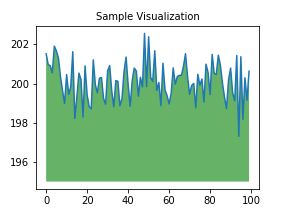

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning that you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for <strong>pandas</strong> code to finish running and want to go faster, you can switch to a GPU runtime and use libraries like <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10-minute guide</a> or
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">US stock market data analysis demo</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning

<div>

These are a few of the notebooks related to machine learning, including Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.


In [ ]:
# Imports & constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42


In [ ]:
 #Load dataset (Kaggle path)
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"  # The filename of the dataset (you can check this in the dataset directory)

# Load the dataset using KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,   # Use Pandas as the format for loading
    "mlg-ulb/creditcardfraud",     # Dataset on Kaggle (mlg-ulb is the username)
    file_path,                    # Specify the file to load from the dataset
)
print("Shape:", df.shape)
display(df.head())
display(df.info())
print("\nMissing values per column:\n", df.isnull().sum())


Using Colab cache for faster access to the 'creditcardfraud' dataset.
Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class distribution (counts):
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (percentage):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


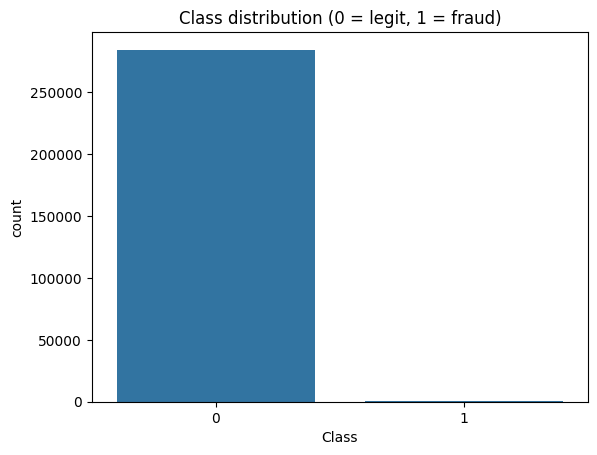

In [ ]:
# Cell 3 - target distribution and summary stats
print("Class distribution (counts):")
print(df['Class'].value_counts())
print("\nClass distribution (percentage):")
print(df['Class'].value_counts(normalize=True) * 100)
display(df[['Time','Amount']].describe())
sns.countplot(x='Class', data=df)
plt.title('Class distribution (0 = legit, 1 = fraud)')
plt.show()

Top correlations with Class:
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
Name: Class, dtype: float64

Lowest correlations with Class:
 V13    -0.004570
V24    -0.007221
Time   -0.012323
V6     -0.043643
V5     -0.094974
V9     -0.097733
V1     -0.101347
V18    -0.111485
V7     -0.187257
V3     -0.192961
V16    -0.196539
V10    -0.216883
V12    -0.260593
V14    -0.302544
V17    -0.326481
Name: Class, dtype: float64


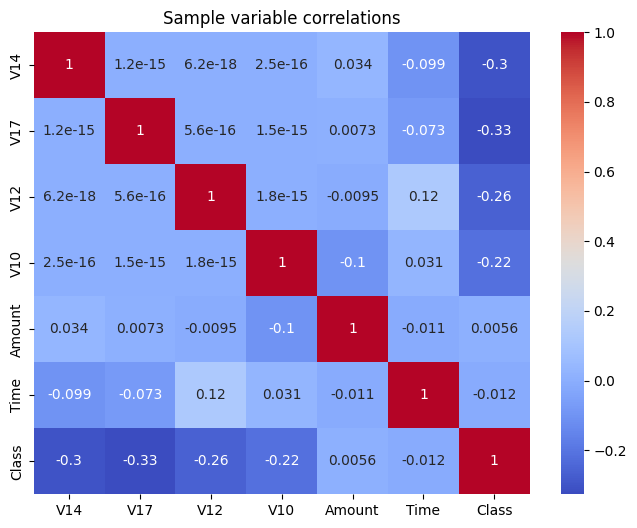

In [ ]:
# correlation with target (quick)
corr = df.corr()
corr_target = corr['Class'].sort_values(ascending=False)
print("Top correlations with Class:\n", corr_target.head(15))
print("\nLowest correlations with Class:\n", corr_target.tail(15))
# heatmap for a selection (optional, small)
plt.figure(figsize=(8,6))
sns.heatmap(df[['V14','V17','V12','V10','Amount','Time','Class']].corr(), annot=True, cmap='coolwarm')
plt.title('Sample variable correlations')
plt.show()

In [ ]:
# preprocess Time & Amount (standardize)
X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X[['Time','Amount']] = scaler.fit_transform(X[['Time','Amount']])
print("Scaled Time & Amount. Example:")
display(X[['Time','Amount']].head())

Scaled Time & Amount. Example:


,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403


In [ ]:
# stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE)
print("Train:", X_train.shape, "Validation:", X_val.shape)
print("Train class ratio:", y_train.value_counts(normalize=True).to_dict())

Train: (227845, 30) Validation: (56962, 30)
Train class ratio: {0: 0.9982707542408216, 1: 0.001729245759178389}


In [ ]:
# Logistic Regression baseline
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print(f"Training time: {(t1-t0):.2f}s")
log_val_proba = log_clf.predict_proba(X_val)[:,1]
log_val_pred = log_clf.predict(X_val)
print("LogReg ROC AUC:", roc_auc_score(y_val, log_val_proba))
print("LogReg Average Precision (PR AUC):", average_precision_score(y_val, log_val_proba))
print("\nClassification report (threshold=0.5):")
print(classification_report(y_val, log_val_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_val, log_val_pred))

Training time: 4.22s
LogReg ROC AUC: 0.9721669425367221
LogReg Average Precision (PR AUC): 0.7189463752156904

Classification report (threshold=0.5):
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962

Confusion matrix:
 [[55475  1389]
 [    8    90]]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.



✅ RF train time: 85.64s


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished



📊 Metrics:
ROC AUC: 0.9533707528453137
Average Precision: 0.8422077143705263

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56864
           1     0.9600    0.7347    0.8324        98

    accuracy                         0.9995     56962
   macro avg     0.9798    0.8673    0.9161     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion Matrix:
 [[56861     3]
 [   26    72]]

Top 20 Feature Importances:
 V14       0.264035
V10       0.099236
V4        0.093160
V17       0.092020
V3        0.086574
V12       0.071943
V16       0.042634
V7        0.032739
V2        0.023991
V9        0.020980
V11       0.018447
V21       0.011706
Amount    0.011640
V20       0.010717
V8        0.010696
V27       0.010455
V19       0.010326
V18       0.009569
V26       0.009357
V13       0.009002
dtype: float64


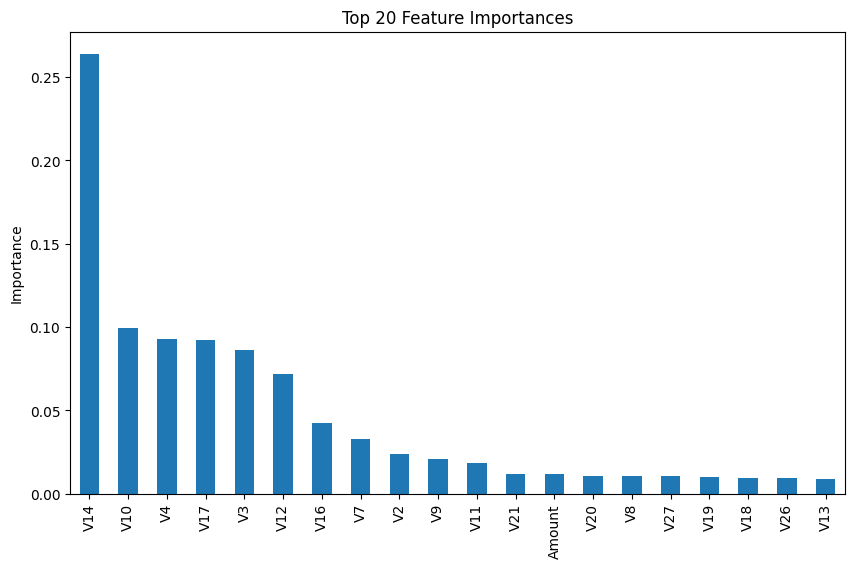

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix

# Light model for testing first
rf = RandomForestClassifier(
    n_estimators=50,  # ↓ fewer trees
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1  # 👈 shows progress per tree
)

t0 = time.time()
rf.fit(X_train, y_train)
t1 = time.time()

print(f"\n✅ RF train time: {(t1 - t0):.2f}s")
rf_val_proba = rf.predict_proba(X_val)[:, 1]
rf_val_pred = rf.predict(X_val)

print("\n📊 Metrics:")
print("ROC AUC:", roc_auc_score(y_val, rf_val_proba))
print("Average Precision:", average_precision_score(y_val, rf_val_proba))
print("\nClassification Report:")
print(classification_report(y_val, rf_val_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_val_pred))

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
print("\nTop 20 Feature Importances:\n", feat_imp)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.ylabel("Importance")
plt.show()


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.8s finished


<Figure size 600x500 with 0 Axes>

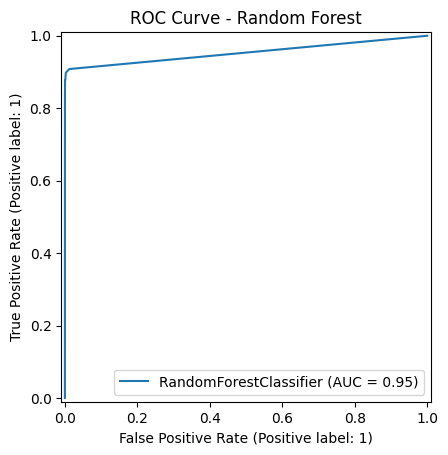

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.8s finished


<Figure size 600x500 with 0 Axes>

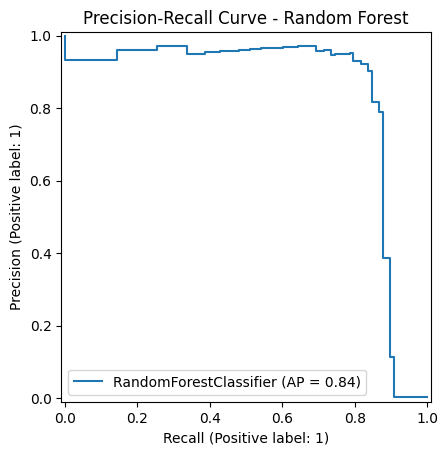

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(rf, X_val, y_val)
plt.title("ROC Curve - Random Forest")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(6, 5))
PrecisionRecallDisplay.from_estimator(rf, X_val, y_val)
plt.title("Precision-Recall Curve - Random Forest")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=RANDOM_STATE)
lr.fit(X_train, y_train)

lr_val_proba = lr.predict_proba(X_val)[:,1]
lr_val_pred = lr.predict(X_val)

print("Logistic Regression ROC AUC:", roc_auc_score(y_val, lr_val_proba))
print("Average Precision:", average_precision_score(y_val, lr_val_proba))
print("\nClassification Report:")
print(classification_report(y_val, lr_val_pred, digits=4))

Logistic Regression ROC AUC: 0.9721669425367221
Average Precision: 0.7189463752156904

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



In [ ]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'ROC AUC': [
        roc_auc_score(y_val, rf_val_proba),
        roc_auc_score(y_val, lr_val_proba)
    ],
    'Average Precision': [
        average_precision_score(y_val, rf_val_proba),
        average_precision_score(y_val, lr_val_proba)
    ]
})

display(results)

,Model,ROC AUC,Average Precision
0,Random Forest,0.953371,0.842208
1,Logistic Regression,0.972167,0.718946


In [ ]:
from sklearn.metrics import recall_score, precision_score

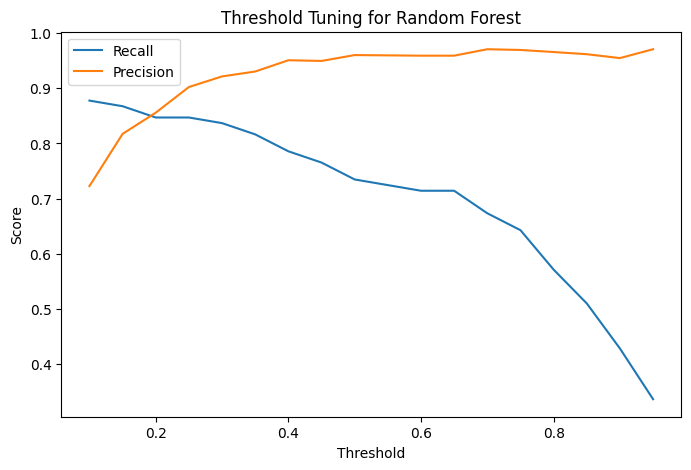

In [ ]:
import numpy as np

thresholds = np.arange(0.1, 1.0, 0.05)
recalls = []
precisions = []

for t in thresholds:
    preds = (rf_val_proba >= t).astype(int)
    recalls.append(recall_score(y_val, preds))
    precisions.append(precision_score(y_val, preds))

plt.figure(figsize=(8,5))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for Random Forest')
plt.legend()
plt.show()